In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as smf
#
%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

# The Importance of Resampling and Regularization

* [Ridge regression](#Ridge-regression)
* [Lasso regression](#Lasso-regression)
* [Advertising Example](#Advertising-Example)
    * [Linear Regression](#Linear-Regression)
    * [Ridge Regression](#Ridge-Regression)
    * [Lasso Regression](#Lasso-Regression)
    * [The comparison](#The-comparison)

Recall the [inear regression](https://hatefdastour.github.io/files/Statistical_Learning/Linear_Regression.html) The linear regression model is expressed as follows
$$Y= \beta_0 + \sum_{j=1}^{p}\beta_{j} X_{j},$$
where $X_j$ represents the j-th predictor and $\beta_j$ quantifies the association between that variable and the response.

The polynomial degree plays an imporant role in the model fitting. The polynomial degree can cause *overfitting* or *Underfitting*. Both underfit and overfit models cannot present the data in an accurate way. Regularization methods can prevent overfitting/underfitting.


Let $n$ and $p$ represent the number of observations and the number of predictors, respectively. Now

* If $n>p$: the least squares estimates tend to have low variance and perform well.
* If $n\leq p$: then variance approaches infinite and the method is unusable.


The linear models can be improved by implementing other fitting procedures instead of least squares. In this article, we compare **ridge regression** and the **lasso regression** method with the linear regression.

## Ridge regression

This  regression equation can be expressed in matrix form as
$$Y = XB + ERR$$
where 
* $Y$: the dependent variable,
* $X$: the independent variables,
* $B$: the regression coefficients to be estimated,
* **ERR**: the errors are residuals.

Note that **Tikhonov regularization** known as **ridge regression** in statistics, and it is known as **weight decay** in machine learning.

## Lasso regression

minimization of function [[Source](https://en.wikipedia.org/wiki/Lasso_(statistics))],

$$\min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\lambda \sum _{j=1}^{p}\vartheta (\beta _{j}^{2})\right\},$$

where 
* $\vartheta (\gamma )$ is an arbitrary concave monotonically increasing function (for example, $ \vartheta (\gamma )={\sqrt {\gamma }}$ gives the lasso penalty,
* $ \vartheta (\gamma )=\gamma ^{1/4}$ gives the $ \ell ^{1/2}$ penalty).

## Advertising Example

Consider the advertising example from *[An Introduction to Statistical Learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7)*.

In [2]:
df = pd.read_csv('../Data/Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


First, let plot the data.

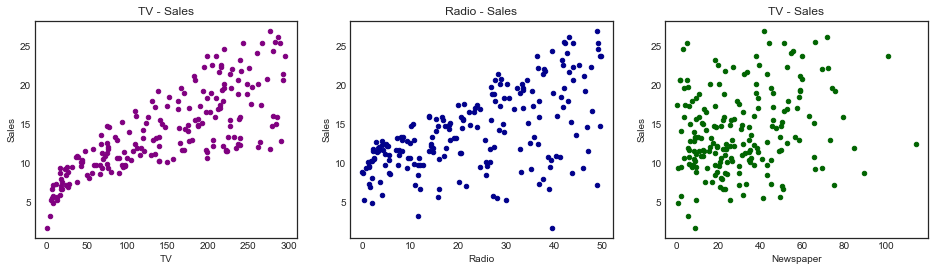

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharex=False)
axes[0].set_title('TV - Sales');
df.plot(ax=axes[0],x ='TV', y='Sales', kind = 'scatter', c='Purple')
axes[1].set_title('Radio - Sales');
df.plot(ax=axes[1],x ='Radio', y='Sales', kind = 'scatter', c='DarkBlue')
axes[2].set_title('TV - Sales');
df.plot(ax=axes[2],x ='Newspaper', y='Sales', kind = 'scatter', c='DarkGreen')

[None, None, None, None, None, None, None, None]

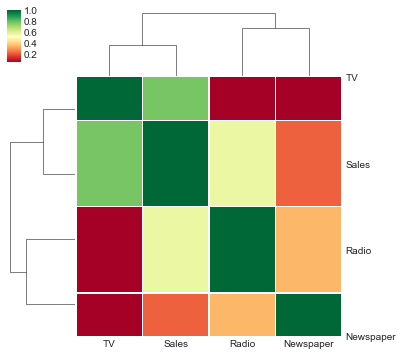

In [4]:
cg = sns.clustermap(df.corr(), cmap ="RdYlGn", linewidths = 0.5, figsize=(6, 6)); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

We can see that the correlation between radio and newspaper is about $0.35$. In other words, we can see a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising.

In [5]:
# train data
x_train=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

## Linear Regression

In [6]:
lreg=LinearRegression()
MSE=cross_val_score(lreg,x_train,y,scoring='neg_mean_squared_error', cv=10)

In [7]:
MSE.mean()

-3.059967618118514

## Ridge Regression 

In [8]:
params={'alpha':np.concatenate((10.**(np.arange(-15,1,2)),10*np.arange(0.,3.,1)), axis=0, out=None)}

In [9]:
rg_reg=GridSearchCV(Ridge(),params, scoring='neg_mean_squared_error',cv=10)
rg_reg.fit(x_train,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01,
       0.e+00, 1.e+01, 2.e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [10]:
print("Best Parameters = %s\n"% rg_reg.best_params_)
print("Best score = %s"% rg_reg.best_score_)

Best Parameters = {'alpha': 20.0}

Best score = -3.0597675395345036


## Lasso Regression

In [11]:
lasso_reg=GridSearchCV(Lasso(),params, scoring='neg_mean_squared_error',cv=10)
lasso_reg.fit(x_train,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01,
       0.e+00, 1.e+01, 2.e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [12]:
print("Best Parameters = %s\n"% lasso_reg.best_params_)
print("Best score = %s"% lasso_reg.best_score_)

Best Parameters = {'alpha': 0.1}

Best score = -3.0557181856110933


## The comparison

We can see that resampling and regularization can improve the fitting accuracy.